**ÍNDICE DE CONTENIDOS**

1. [Introducción al problema de modelización](#topic1)
2. [Pre-procesando el conjunto de datos](#topic2)
3. [Construyendo la red neuronal artificial](#topic3)
4. [Entrenando la red neuronal artificial](#topic4)
5. [Validando el modelo de deep learning propuesto](#topic5)

---



# 1. Introducción al problema de clasificación <a id="topic1"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

**Problema de modelización de la pérdida de clientes (Customer Churn)**

En este notebook resolveremos un problema de modelización de la pérdida de clientes para un banco. Partiremos de un conjunto de datos con una muestra de 10.000 clientes. El archivo de datos se llama *Churn_Modelling.csv*. Para crear este conjunto de datos, el banco recolectó información como la identificación del cliente, el género, la edad, la antigüedad, el saldo de la cuenta, si el cliente es activo o no, si tiene una tarjeta de crédito, etc. Durante un período de 6 meses, el banco observó si estos clientes abandonaban o permanecían en el banco.

El objetivo va a ser hacer una Red Neural Artificial (RNA) que pueda predecir, basándose en la información recogida en dicho dataset, si dichos clientes dejarán el banco o se quedarán. Además, tendremos que clasificar a todos los clientes del banco, basándonos en la probabilidad de salida de los mismos.

Si tenemos éxito en este proyecto, crearemos un valor agregado significativo para el banco ya que podría reducir significativamente la tasa de pérdida de clientes. Recordad que las fases básicas para implementar un algoritmo de aprendizaje profundo son las siguientes:

1. Procesado datos entrada red neuronal
2. Definición del modelo de red neuornal
3. Configuración del proceso de aprendizaje
4. Entrenamiento del modelo de red neuronal
5. Evaluación del modelo de red neuronal

### Importamos las librerías necesarias


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. Pre-procesando el conjunto de datos <a id="topic2"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>



### Importar el dataset


In [3]:
# Sincronizamos Google Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargamos el conjunto de datos
dataset = pd.read_csv('/content/drive/My Drive/Churn_Modelling.csv')

In [ ]:
# Definimos las variables independientes
x = dataset.iloc[:, 3:13].values

# Comprobamos que hemos realizado correctamente la selección
print("x: ", x)
print("x ndim: ", x.ndim)
print("x shape:", x.shape)
print("x size: ", x.size)
print("x dtype: ", x.dtype)

x:  [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
x ndim:  2
x shape: (10000, 10)
x size:  100000
x dtype:  object


In [ ]:
# Definimos la variable que queremos explicar (dependiente)
y = dataset.iloc[:, 13].values

# Comprobamos que hemos realizado correctamente la selección
print("y: ", y)
print("y ndim: ", y.ndim)
print("y shape:", y.shape)
print("y size: ", y.size)
print("y dtype: ", y.dtype)

y:  [1 0 1 ... 1 1 0]
y ndim:  1
y shape: (10000,)
y size:  10000
y dtype:  int64



### Tenemos que codificar las variables categóricas previamente

Se trata de codificar todas las variables a valores numéricos codificando todas aquellas variables que no vengan ezpresado a través de números. En este caso, codificaremos las variables categóricas como pueden ser la variable país o género en variables dummies.

Las variables dummies es una columna para cada una de las categorías y tomará los valores 0 o 1 si la observación pertenece o no a dicha categoría. Para realizar eso en Python utilizaremos los codificadores OneHotEncoder y LabelEncoder.


In [ ]:
# Variables independientes
# Codificamos las variables categóricas en variables dummies
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# Cargamos la función pertinente de la librería scikit-learn
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Realizamos la transformación para cada una de las variables que nos interesan
# Transformación de la columna 1 (país) en variable dummy
labelencoder_x_1 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:, 1])

# Comprobamos que se ha realizado correctamente
x

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# Cuando estamos considerando más de 3 categorías y queremos crear variables dummmies
# para no caer en problemas de multicolinealidad debido al exceso de variables creadas artificialmente
# tenemos que eliminar siempre 1 columna. Para ello utilizaremos las funciones OneHotEncoder y ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ("Churn_Modelling",        # Un nombre de la transformación
         OneHotEncoder(categories='auto'), # La clase a la que transformar
         [1]            # Las columnas a transformar.
         )
    ], remainder='passthrough'
)

x = transformer.fit_transform(x) # aplicamos la función transformer
x = x[:, 1:] # eliminamos la columna 1º

# Comprobamos que se ha realizado correctamente
x[:, 0:3]

array([[0.0, 0.0, 619],
       [0.0, 1.0, 608],
       [0.0, 0.0, 502],
       ...,
       [0.0, 0.0, 709],
       [1.0, 0.0, 772],
       [0.0, 0.0, 792]], dtype=object)

In [ ]:
# Realizamos la misma operación para la siguiente variable
# Vemos el número de la columna
x[:, 0:5]

array([[0.0, 0.0, 619, 'Female', 42],
       [0.0, 1.0, 608, 'Female', 41],
       [0.0, 0.0, 502, 'Female', 42],
       ...,
       [0.0, 0.0, 709, 'Female', 36],
       [1.0, 0.0, 772, 'Male', 42],
       [0.0, 0.0, 792, 'Female', 28]], dtype=object)

In [ ]:
# Transformación de la columna 2 (género) en variable dummy
labelencoder_x_2 = LabelEncoder()
x[:, 3] = labelencoder_x_2.fit_transform(x[:, 3])

In [ ]:
# Comprobamos que se ha realizado correctamente
x[:, 0:5]

# ¿Tendría sentido aplicar aquí la creación de nuevas variables artificiales?
# No, ya que tenemos solo 2 categorías y la transformación realizada ya es una
# variable dummy per se. Recordad que las variables dummies solo toman valores 0 o 1.

array([[0.0, 0.0, 619, 0, 42],
       [0.0, 1.0, 608, 0, 41],
       [0.0, 0.0, 502, 0, 42],
       ...,
       [0.0, 0.0, 709, 0, 36],
       [1.0, 0.0, 772, 1, 42],
       [0.0, 0.0, 792, 0, 28]], dtype=object)


### Dividimos el dataset en conjunto de entrenamiento y conjunto de testing




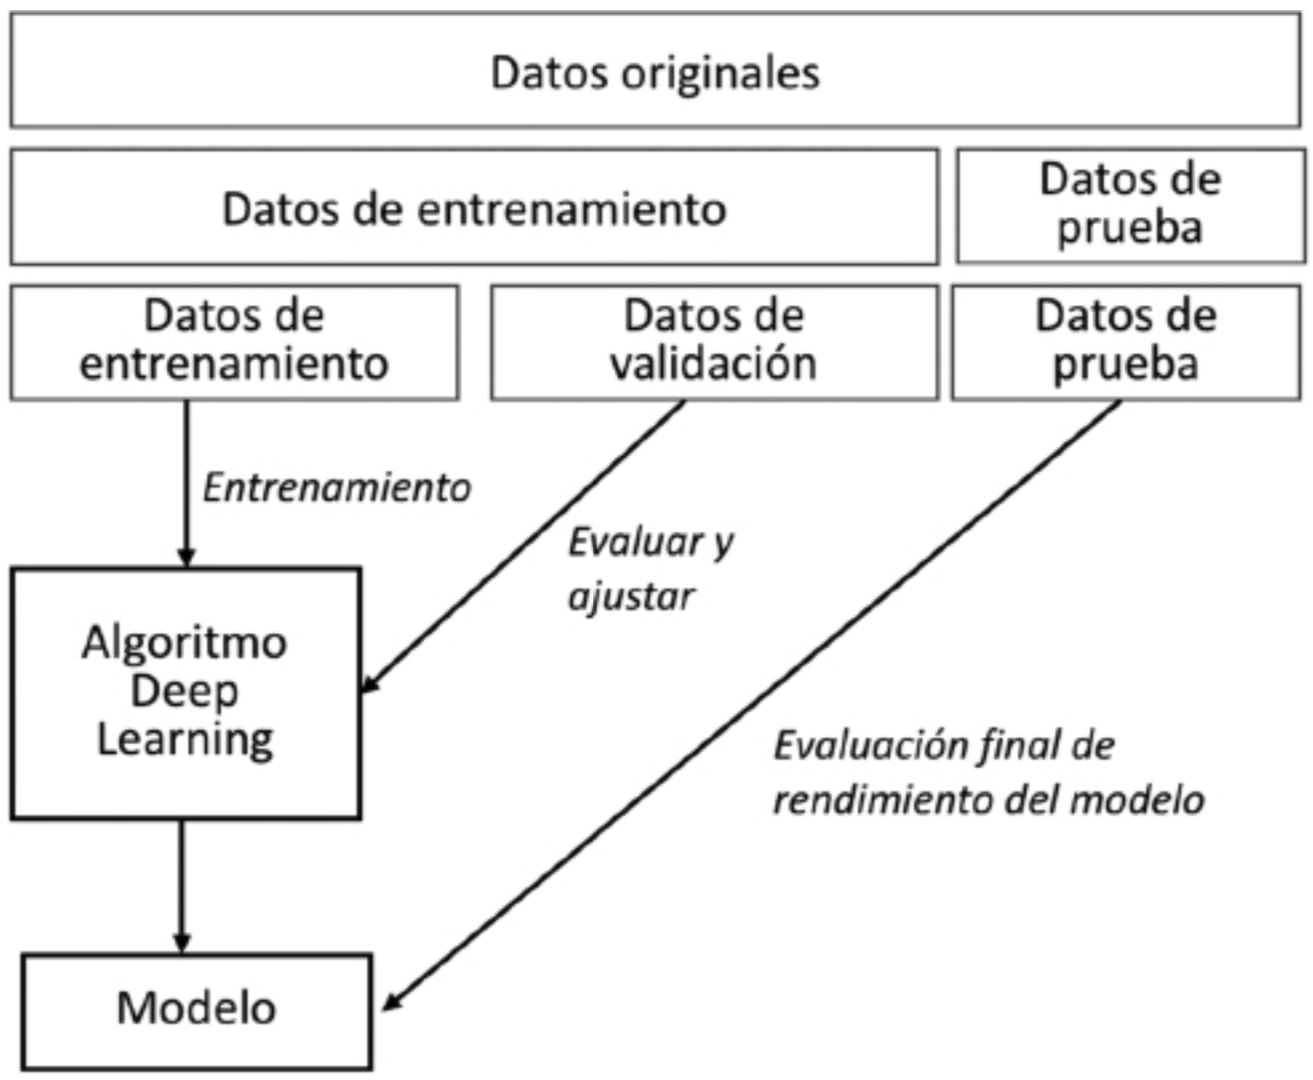


In [ ]:
# Utilizaremos la función train_test_split
from sklearn.model_selection import train_test_split

# Consideramos 8000 observaciones para entrenamiento y 2000 para validación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Obervamos el conjunto de entrenamiento (variables independientes)
print("x_train: ", x_train)
print("x_train ndim: ", x_train.ndim)
print("x_train shape:", x_train.shape)
print("x_train size: ", x_train.size)
print("x_train dtype: ", x_train.dtype)

x_train:  [[0.0 1.0 667 ... 1 0 163830.64]
 [1.0 0.0 427 ... 1 1 57098.0]
 [0.0 0.0 535 ... 1 0 185630.76]
 ...
 [0.0 0.0 738 ... 1 0 181429.87]
 [0.0 1.0 590 ... 1 1 148750.16]
 [1.0 0.0 623 ... 1 0 118855.26]]
x_train ndim:  2
x_train shape: (8000, 11)
x_train size:  88000
x_train dtype:  object


In [ ]:
# Obervamos el conjunto de entrenamiento (variable dependiente)
print("y_train: ", y_train)
print("y_train ndim: ", y_train.ndim)
print("y_train shape:", y_train.shape)
print("y_train size: ", y_train.size)
print("y_train dtype: ", y_train.dtype)

y_train:  [0 0 0 ... 0 0 1]
y_train ndim:  1
y_train shape: (8000,)
y_train size:  8000
y_train dtype:  int64


In [ ]:
# Obervamos el conjunto de test (variables independientes)
print("x_test: ", x_test)
print("x_test ndim: ", x_test.ndim)
print("x_test shape:", x_test.shape)
print("x_test size: ", x_test.size)
print("x_test dtype: ", x_test.dtype)

x_test:  [[1.0 0.0 597 ... 1 1 192852.67]
 [0.0 0.0 523 ... 1 0 128702.1]
 [0.0 1.0 706 ... 1 1 75732.25]
 ...
 [0.0 1.0 578 ... 1 0 141533.19]
 [1.0 0.0 650 ... 1 1 11276.48]
 [1.0 0.0 573 ... 1 0 192950.6]]
x_test ndim:  2
x_test shape: (2000, 11)
x_test size:  22000
x_test dtype:  object


In [ ]:
# Obervamos el conjunto de test (variable dependiente)
print("y_test: ", y_test)
print("y_test ndim: ", y_test.ndim)
print("y_test shape:", y_test.shape)
print("y_test size: ", y_test.size)
print("y_test dtype: ", y_test.dtype)

y_test:  [0 1 0 ... 0 0 0]
y_test ndim:  1
y_test shape: (2000,)
y_test size:  2000
y_test dtype:  int64


### Finalmente, tenemos que realizar el escalado de las variables (estandarización)

Este proceso es muy importante sobre todo cuando estamos utilizando algoritmos de aprendizaje profundo para que la red tome por igual a las variables que pertenecen a la capa de entrada.

Sabemos que una red neruonal fundamentalmente hace sumas y productos y en nuestro dataset tenemos variables que toman valores que destacan por encima del resto como pueden ser la propia variable CreditScore, Balance o EstimatedSalary.

Luego, tenemos que armonizar las esacalas de valores que toman todas las variables que estamos teniendo en cuenta.


In [ ]:
# Estandarizamos las variables con la función StandardScaler
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

# Variables independientes entrenamiento estandarizadas
x_train = sc_x.fit_transform(x_train)

# Visualizamos
x_train[:, 0:5]

array([[-0.5698444 ,  1.74309049,  0.16958176, -1.09168714, -0.46460796],
       [ 1.75486502, -0.57369368, -2.30455945,  0.91601335,  0.30102557],
       [-0.5698444 , -0.57369368, -1.19119591, -1.09168714, -0.94312892],
       ...,
       [-0.5698444 , -0.57369368,  0.9015152 ,  0.91601335, -0.36890377],
       [-0.5698444 ,  1.74309049, -0.62420521, -1.09168714, -0.08179119],
       [ 1.75486502, -0.57369368, -0.28401079, -1.09168714,  0.87525072]])

In [ ]:
# Variables independientes testing estandarizadas
x_test = sc_x.transform(x_test) # aquí ponemos transform únicamente para decirle que haga la misma transformación que hemos aplicado sobre el conjunto de entrenamiento

# Visualizamos
x_test[:, 0:5]

array([[ 1.75486502, -0.57369368, -0.55204276, -1.09168714, -0.36890377],
       [-0.5698444 , -0.57369368, -1.31490297, -1.09168714,  0.10961719],
       [-0.5698444 ,  1.74309049,  0.57162971, -1.09168714,  0.30102557],
       ...,
       [-0.5698444 ,  1.74309049, -0.74791227,  0.91601335, -0.27319958],
       [ 1.75486502, -0.57369368, -0.00566991,  0.91601335, -0.46460796],
       [ 1.75486502, -0.57369368, -0.79945688,  0.91601335, -0.84742473]])



---
✅ Ya estamos listo para comenzar a contruir nuestra RNA

---



# 3. Construyendo la red neuronal artificial <a id="topic3"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

### Importar las librerías TensorFlow y Keras

**TensorFlow** es un ecosistema propuesto por Google que se ha convertido en el entorno más popular para desarrolladores de aplicaciones que requieran Deep Learning. Desde su lanzamiento inicial en 2015 por parte del equipo de Google Brain, el paquete cuenta con decenas de millones de descargas y con alrededor de dos mil contribuidores. Después de mucha expectación Google lanzó TensorFlow 2.0, el 30 de septiembre de 2019, que representa un hito importante en el desarrollo de esta librería siendo su página web [https://www.tensorflow.org/](https://https://www.tensorflow.org/).

Los modelos de Deep Learning son complejos y, si se quieren programar a bajo nivel, requieren un conocimiento matemático de base importante para manejarse fácilmente. Por suerte para nosotros, Keras encapsula las sofisticadas matemáticas de tal manera que el desarrollador de una red neuronal solo necesita saber construir un modelo a partir de componentes preexistentes y acertar en su parametrización, como veremos.

Si quisiéramos construir la arquitectura de nuestra RNA sin la ayuda de esta librería necesitaríamos escribir miles de líneas de código. En cambio, utilizamos las librería de TensorFlow que incluyen funciones de alto nivel que nos ayudan a poder crear nuestros propios algoritmos de RNA sin llegar a tener conocimientos a tan bajo nivel.

De hecho, vamos a utilizar una librería que a su vez está creada a partir de TensorFlow como es la librería de **Keras**. Es una capa que está por encima de TensorFlow que nos permite aplicar las funciones que pertenecen al propio TensorFlow pero sin contar con unos conocimientos tan técnicos desde el punto de vista de la programación.

La implementación de referencia de la librería de Keras fue desarrollada y es mantenida por François Chollet, ingeniero de Google, y su código ha sido liberado bajo la licencia permisiva del MIT. Su documentación y especificaciones están disponibles en la página web oficial [https://keras.io](https://keras.io).

En resumen, para iniciarse con los algoritmos de aprendizaje profundo, Keras y TensorFlow son una combinación poderosa que os permitirá construir cualquier red neuronal que se os ocurra en un entorno de producción.

In [ ]:
# Tenemos que importar Keras y funciones adicionales de sublibrerías de Keras
import keras # a su vez importa TensorFlow
from keras.models import Sequential # necesitamos la función de Sequential para inicializar los valores de los parámetros de las RNA
from keras.layers import Dense # y la función Dense que sirve para crear cada una de las capas intermedias (ocultas) de las RNA

### Procedimiento para construir una red neuronal artificial

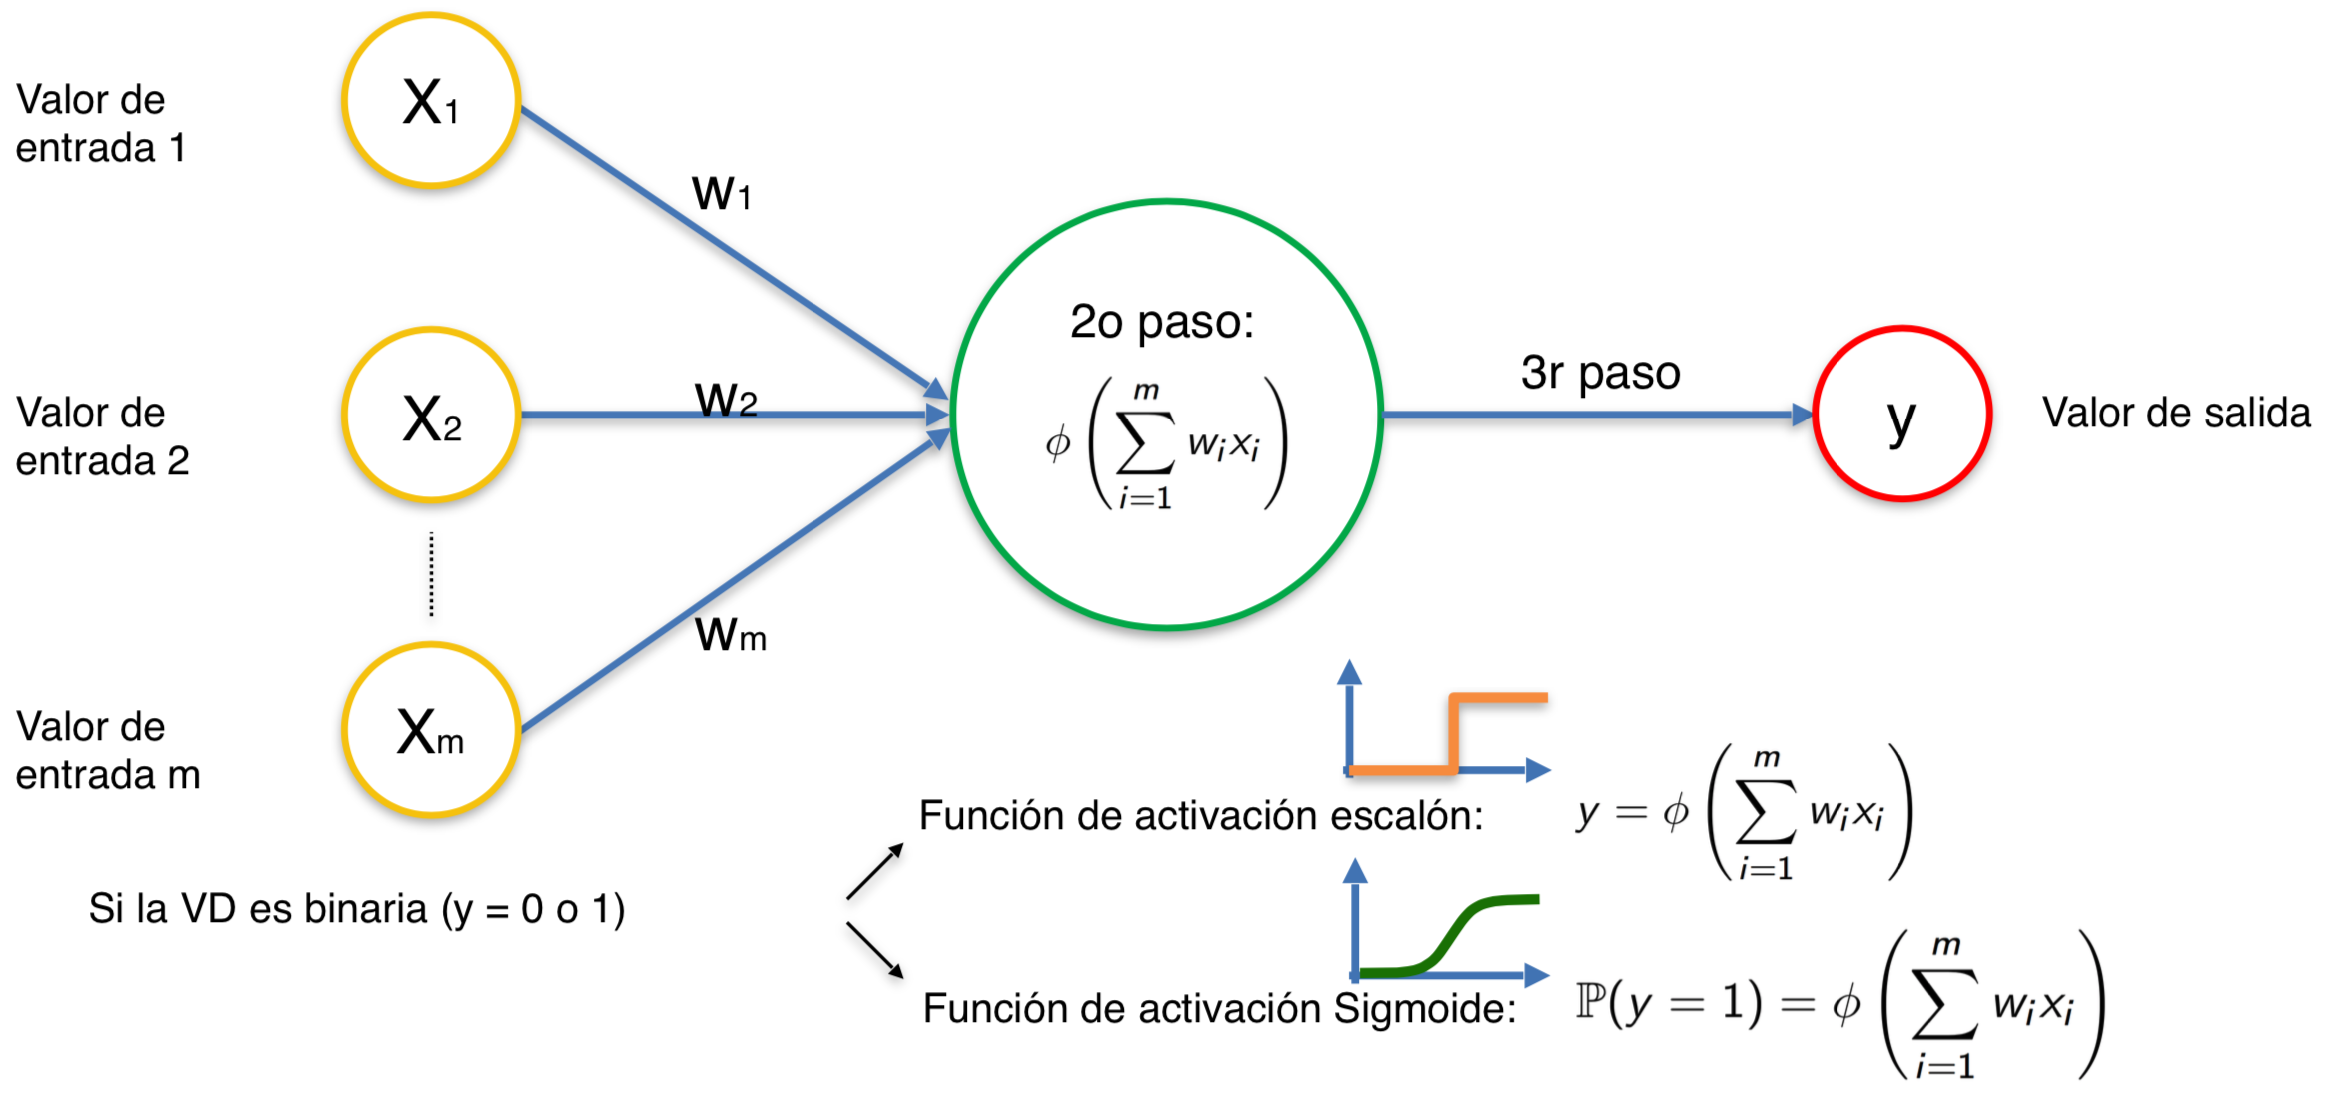

In [ ]:
# Inicializamos la RNA con la función Sequential
rna = Sequential()

In [ ]:
# Vamos a tener 11 nodos en la capa de entrada ya que tenemos 11 variables independientes
x_train.shape

(8000, 11)

**1º decisión** ¿Cuál es número de nodos que vamos a considerar en la capa de entrada? [input_dim]

En nuestro caso vamos a considerar 11 nodos que corresponden a cada una de las variables independientes del problema propuesto.

**2º decisión** ¿Cuál es el número de nodos que vamos a considerar en la capa oculta? [units]

No hay una regla para elegir el No. nodos en la capa oculta. Un criterio que se suele seguir es tomar la media de la suma de los nodos de las capas de entrada y salida. En este caso, 11 + 1 = 12 / 2 = 6

**3º decisión** ¿Cómo inicializaremos los pesos iniciales entre los nodos de la capa de entrada y los nodos de la capa oculta? [kernel_initializer]

Recordad que tiene que tener una asignación totalmente aleatoria pero qué tipo de distribución de probabilidad elegimos? Nosotros utilizaremos la función de distribución uniforme ya que nos garantiza unas pesos diferentes a cero y pequeños puesto que oscila entre 0 y 1.

**4º decisión** ¿Cuál es la función de activación que vamos a elegir para que se aplique en la capa oculta? [activation]

Nosotros en este ejemplo vamos a utilizar la función de rectificador lineal unitario (relu) que hace que se aplique la función del max (0,x).



In [ ]:
# Añadimos las capas de entrada y una primera capa oculta utilizando la función Dense
# units = no. nodos que vamos a considerar en la primera capa oculta
# kernel_initializer = función de distribución para inicializar los pesos
# activation = función de activación elegida
# input_dim = no. nodos que vamos a considerar en la capa de entrada
rna.add(Dense(units = 6, kernel_initializer = "uniform",
                     activation = "relu", input_dim = 11))

**5º decisión** ¿Cuántas capas ocultas queremos añadir?

En este caso vamos a crear una RNA con 2 capas ocultas. Al añadir una segunda capa oculta y sucesivas ya no necesitamos especificar el argumento *input_dim* ya que sabemos que partimos de 6 nodos en la 1º capa oculta y no es necesario especificarlo. Vamos a continuar manteniendo un método uniforme a la hora de establecer el no. nodos en cada una de las capas ocultas siguiendo el criterio de (11 + 1) / 2 = 6. Seguimos con la misma función de activación también.

In [ ]:
# Añadimos una segunda capa oculta
rna.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))

**6º decisión** ¿Cómo conectamos la última capa oculta con la capa de salida?

En este caso como la capa de salida va a tener únicamente un único nodo de salida tenemos que cambiar el parámetro *units*. Además, vamos a considerar que la función de activación en esta capa de salida sea la sigmoide que recordad nos va a convertir los pesos en probabilidades. Es decir, cuánto de probable es que un cliente del banco abandone el mismo, por ejemplo.

Por otro lado, si suponemos que quisiéramos hacer una clasificación de los clientes en más de 2 categorías, tendríamos que cambiar el número de nodos en la capa de salida incluyendo un nodo por categoría y además, la función de activación sigmoid no sería la más conveniente pudiendo utilizar en su lugar la función escalón para determinar si pertenece (0) o no pertenece (1) a esa clase.

In [ ]:
# Finalmente añadimos la capa de salida
rna.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

**7º decisión** ¿Qué algoritmo de aprendizaje vamos a considear para optimizar los pesos y realizar la propagación de errores hacia atrás? [optimizer]

Para ello tendremos que unir todos los nodos de las diferentes capas creadas y compilar la RNA conforme a la arquitectura diseñada para que podamos empezar a darle los datos de entrada y realice todo el flujo de trabajo que hemos visto en las slides de teoría.

Utilizaremos el método *compile* cuyos argumentos son los siguientes. Os dejo enumerados los diferentes algoritmos optimizadores de los valores de los parámetros que podemos considerar en Keras:

1. **SGD**: El descenso estocástico o gradiente de descenso incremental, es una aproximación estocástica del gradiente descendiente usado para minimizar una función objetivo que se escribe como una suma de funciones diferenciables. Este optimizador trata de encontrar mínimos o máximos por iteración. Al igual que en la función del gradiente descendente, el gradiente indica la dirección en la que la función tiene el ratio de aumento más pronunciada aunque no indica hasta donde se debe avanzar en esa dirección.
Como este optimizador no nos fija cuanto avanzar, existe el ratio de aprendizaje que no determina la distancia que recorrerá en cada iteración en la dirección que del gradiente.

2. **Adam**: El optimizador Adam trata de solventar el problema con la fijación del ratio de aprendizaje del SGD, para ello adapta el ratio de aprendizaje en función de cómo estén distribuidos los parámetros. Si los parámetros están muy dispersos el ratio de aprendizaje aumentará.

3. **RMSProp**: Root Mean Square Propagation es también una modificación del optimizador SGD que se basa en un ratio de aprendizaje adaptativo.

4. **Adagrad**: El optimizador Adagrad es un algoritmo basado en gradiente que adapta el ratio de aprendizaje a los parámetros.
Realiza grandes actualizaciones cuando los parámetros son poco frecuentes y pequeñas actualizaciones cuando son muy frecuentes.

5. **Adadelta**: El optimizador Adadelta es una extensión del algoritmo Adagrad.

En la propia página de Keras podréis encontrar información interesante sobre cada uno de ellos. Nosotros vamos a utilizar en este ejemplo el optimizador Adam que es una versión mejorada del SGD (Gradiente Descendente Estocástico).

**7º decisión** ¿Qué función de costes vamos a considerar? ¿Cómo medimos el error cometido entre el valor real y el valor de predicción? [loss]

Existen diferentes funciones de costes como vimos en las slides de teoría. Entre ellas está la Ordinary Least Square (OLS) que si os acordáis, es la suma de las diferencias entre el valor real y el valor de predicción al cuadrado. Esta la hemos utilizado para estimar los parámetros betas en los modelos de regresión lineal en la asignatura de análisis estdístico o en la regresión logística.

Os dejo enumerados las diferentes funciones de costes que podemos considerar en Keras:

1. **RMSE**: La raíz cuadrada media, es una medida de precisión calculada como la raíz cuadrada media de los residuos. Se entiende como residuos la diferencia entre el valor previsto (correcto) y el valor real obtenido.

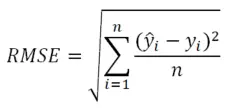

2. **MAE**: El error absoluto medio, es una medida de precisión y se calcula como la suma media de los valores absolutos de los errores.

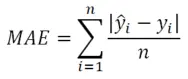

3. **MASE**: El error absoluto medio escalado, es una medida de precisión similar al MAE pero escalado.

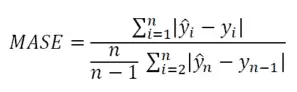

4. **CCE**: La entropía cruzada categórica, es una medida de precisión para variables categóricas.

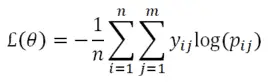

5. **BCE**: La entropía cruzada binaria, es una medida de precisión para variables binarias.

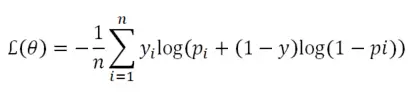

En nuestro ejemplo utilizaremos el binary cross entropy ya que estamos ante un clasificador binario.

**8º decisión** ¿Qué métrica de precisión vamos a considerar para mejorar en la fase de entrenamiento tras cada iteración? [metrics]

En nuestro caso, utilizaremos la métrica de *accuracy* que se basa en la fase de entrenamiento aumentar la precisión de una iteración a la siguiente. Luego, elegiremos la métrica de la precisión.

In [ ]:
# Compilar la RNA y unir todos los nodos
# optimizer = algoritmo que buscará las estimaciones óptimas de los pesos
# loss = función de costes
# metrics = métrica elegida
rna.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# 4. Entrenando la red neuronal artificial <a id="topic4"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


### ¿Cómo realizamos el proceso de entramiento?

Llegamos a una de las fases más esperadas e interesantes ya que una vez definida la estructura de nuestra RNA e implementada vamos a pasar a entrenarla. Para ello, tenemos que pasarle a nuestra red el conjunto de datos de entrenamiento. Utilizaremos la función *fit*.

Aquí tenemos dos parámetros que tenemos que tener en cuenta a la hora de realizar el proceso de entrenamiento de nuestra RNA:

* **Tamaño del lote** [batch_size]: tamaño del bloque a procesar en el conjunto de entranmiento.

* **Periodo** [epochs]: número de iteraciones globales que va a realizar el algoritmo.

Por lo general, cuanto mayor sea el número de epochs, es decir, más veces pasa la red por el conjunto de datos, más aprenderá sobre él PERO hay que tener cuidado ya que pasar un número excesivo de veces conllevará que tendremos problemas de *sobreajuste*. En este último caso, conseguiremos que en el conjunto de testing se comporte peor el algoritmo ya que se ha sobreajustado demasiado a ese conjunto en particular y no se ajusta bien entonces a nuevos datos que le metamos.

En nuestro caso, vamos a utilizar un tamaño del lote de 10. Es decir, procesar los primeros 10 elementos y corregir los pesos, otros 10 elementos y volver a corregir los pesos y así sucesivamente hasta los 10000 elementos que tiene nuestra base de datos. Esto sería el enfoque de *mini-batch*.

Recordad que esto sería más eficiente que coger elemento a elemento y procesar la red (*estocástico*) o coger todos los elementos y pasarle la red (*por bloque*) en el que tenemos el problema de localización del mínimo global de la función de costes.

Con respecto al número de periodos (*epochs*), el estándar, es realizar 100 iteraciones globales teniendo en cuenta en cada una de estas iteraciones globales todas las iteraciones parciales que tendrá que hacer el algoritmo para cada uno de los lotes hasta completar una iteración global cuando lleguemos a las 10000 observaciones.



In [ ]:
# Ajustamos la RNA al conjunto de entrenamiento
rna.fit(x_train, y_train,  batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 5s 3ms/step - loss: 0.4971 - accuracy: 0.7955
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4293 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4249 - accuracy: 0.7985
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4187 - accuracy: 0.8278
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4132 - accuracy: 0.8324
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4090 - accuracy: 0.8330
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4061 - accuracy: 0.8353
Epoch 8/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4038 - accuracy: 0.8364
Epoch 9/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4025 - accuracy: 0.8340
Epoch 10/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4012 - accura

# 5. Validando el modelo de deep learning propuesto <a id="topic5"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


### Validando la red neuronal estimada en la fase de entrenamiento

En esta fase ejecutaremos el algoritmo en el conjunto de testing para ver si es capaz de predecir a usuarios que no conoce de nada ya que no los hemos utilizado a la hora de entrenar la red. Tened en cuenta que en nuestro caso, el resultado que obtengamos vendrá expresado en porcentaje ya que hemos considerado la función de activación sigmoide en la capa de salida. Es decir, cuánto de probable es que un cliente abandone el banco.

In [ ]:
# Obtenemos las predicciones sobre los 2000 clientes del conjunto de testing
y_pred  = rna.predict(x_test)

# Visualizamos los resultados obtenidos de los primeros 20 clientes
y_pred[:19]

63/63 [==============================] - 0s 2ms/step


array([[0.22223216],
       [0.3387758 ],
       [0.198048  ],
       [0.05303152],
       [0.04769278],
       [0.8962011 ],
       [0.02821823],
       [0.06357203],
       [0.20351143],
       [0.82820415],
       [0.01615402],
       [0.24243549],
       [0.19237319],
       [0.19242753],
       [0.6242988 ],
       [0.44645724],
       [0.06859834],
       [0.11430585],
       [0.11450885]], dtype=float32)

In [ ]:
# Podríamos hacer una selección en funión de

### ¿Hemos obtenido la misma precisión sobre este conjunto de testing que el obtenido en el caso del conjunto de entrenamiento?

Este paso es fundamental para saber saber si los resultados obtenidos son válidos o no. Es decir, si podemos confiar en ellos a la hora de tomar una decisión. Para ello, tendremos que elaborar la **matriz de confusión** sobre el conjunto de datos testing para medir la precisión de la red que hemos entrenado sobre este conjunto de datos que el algoritmo no conocía.

En primer lugar, tenemos que convertir las probabilidades en categorías de abandona/no abandona que será las etiquetas que se tendrán en cuenta en dicha matriz de confusión. Para ello, tendremos que fijar un unbral de corte a partir del cuál al banco le va a interesar identificar esos clientes para
contactar con ellos y tomar una decisión sobre la permanencia de los mismos. En este caso, consideramos un umbral mayor al 50%.


In [ ]:
# Fijamos el umbral de abandono a aquellos clientes que tengan una probabilidad mayor que el 50%
y_pred = (y_pred>0.5)

# Visualizamos los resultados obtenidos de los primeros 20 clientes
y_pred[:19]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False]])

In [ ]:
# Elaboramos la matriz de confusión para ver el número de predicciones correctas
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizamos los resultados obtenidos de la matriz de confusión
cm

array([[1531,   64],
       [ 212,  193]])

El resultado obtenido es el siguiente. De las 2000 nuevas evaluaciones, 1555 + 140 = 1695 son predicciones correctas y 40 + 265 = 305 son incorrectas. Todo parece indicar que hemos obtenido buenos resultados. Veamos el procentaje de precisión obtenido.

In [ ]:
(1518+166)/2000

0.842

In [ ]:
(cm[0][0]+cm[1][1])/cm.sum()

0.862

Genial!! Un 84% de precisión. El modelo quedaría validado ya que hemos obtenido un porcentaje en testing similar al obtenido en la fase de entrenamiento.

Tened en cuenta que hemos obtenido un resultado muy bueno sin llegar a realizar ningún tipo de ajuste de hiperparámetros ni nos hemos entretenido en modificar más o menos capas intermedias. Quizás cuando veamos las técnicas de validación y ajuste de hiperparámetros aún podemos refinar un poco más los resultados obtenidos y obtener una precisión aún mejor. A pesar de ello, simplemente configurando nuestra primera RNA vemos que los resultados han sido muy muy buenos para nuestro clasificador.

Esto ayudará al banco a tomar las decisiones oportunas sobre su cartera de clientes ya que contará con una herramienta que le ayudará cuán probable es que un cliente abandone el banco teniendo en cuenta las variables consideradas en dicho problema.

### Predecir una nueva observación

Finalmente, utilizando nuestro modelo de RNA al banco le podría interesar predecir si el perfil del nuevo cliente se ajusta al de nuestros clientes actuales que abandonarían el banco o no para saber si lo aceptamos y abrimos una cuenta nueva. La información del posible cliente sería la siguiente:

*   Geografia: Francia
*   CreditScore: 600
*   Género: masculino
*   Edad: 40 años
*   Tenure: 3 años
*   Depósito: 60000
*   Número de productos: 2
*   ¿Este cliente pediría una tarjeta de crédito? Sí
*   ¿Sería este cliente un miembro activo? Sí
*   Salario estimado: 50000



In [ ]:
new_predict = rna.predict(sc_x.transform(np.array([[0,0,600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
print(new_predict)
print(new_predict > 0.5)

1/1 [==============================] - 0s 40ms/step
[[0.03737973]]
[[False]]


Podemos ver cómo con las características de este cliente obtenemos un porcentaje muy pequeño de un posible abandono. No llega al 10%. Luego, en este caso, sería un cliente que nos interesaría ya que se asemeja al perfil de aquellos clientes que tenemos en cartera cuya probabilidad de abandono es poco probable.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>